In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Import opencv
import cv2 

# Import uuid
import uuid

# Import Operating System
import os

# Import time
import time

In [ ]:
## Training and detection

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'm'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'labelmap.txt'

In [120]:
paths = {
    'WORKSPACE_PATH': os.path.join('/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/TFTrained/', 'workspace'),
    'SCRIPTS_PATH': os.path.join('/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/TFTrained/','scripts'),
    'APIMODEL_PATH': os.path.join('/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/TFTrained/','models'),
    'ANNOTATION_PATH': os.path.join(paths['WORKSPACE_PATH'],'annotations'),
    'IMAGE_PATH': os.path.join(paths['WORKSPACE_PATH'],'images'),
    'LABELMAP':os.path.join(paths['WORKSPACE_PATH'],'label')
    #  'MODEL_PATH': os.path.join(paths['WORKSPACE_PATH'],'models')
    # 'PRETRAINED_MODEL_PATH': os.path.join(paths['WORKSPACE_PATH'],'pre-trained-models'),
    #  'CHECKPOINT_PATH': os.path.join(paths['MODEL_PATH'],CUSTOM_MODEL_NAME),
    # 'OUTPUT_PATH': os.path.join(paths['CHECKPOINT_PATH'], 'export'), 
    # 'TFJS_PATH':os.path.join(paths['CHECKPOINT_PATH'], 'tfjsexport'), 
    # 'TFLITE_PATH':os.path.join(paths['CHECKPOINT_PATH'],'tfliteexport'), 
    # 'PROTOC_PATH':os.path.join('/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/TFTrained/','protoc')
}

In [122]:
files = {
    'PIPELINE_CONFIG':os.path.join('/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/TensorFlow/workspace/models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
## this is where the code of obejct detection API gets cloned in local. This is a pretarined model. 

In [2]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [1]:
!pip install tensorflow --upgrade

In [123]:
import tensorflow

In [124]:
import tensorflow as tf

In [125]:
 pip list

Package                         Version
------------------------------- ----------------------
absl-py                         1.3.0
aeppl                           0.0.33
aesara                          2.7.9
aiohttp                         3.8.3
aiosignal                       1.3.1
alabaster                       0.7.12
albumentations                  1.2.1
altair                          4.2.0
appdirs                         1.4.4
arviz                           0.12.1
astor                           0.8.1
astropy                         4.3.1
astunparse                      1.6.3
async-timeout                   4.0.2
atari-py                        0.2.9
atomicwrites                    1.4.1
attrs                           22.2.0
audioread                       3.0.0
autograd                        1.5
Babel                           2.11.0
backcall                        0.2.0
beautifulsoup4                  4.6.3
bleach                          5.0.1
blis                        

In [126]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [127]:
from PIL import Image
import PIL
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [21]:
from PIL import Image
import PIL
import glob, os


for label in range(0,5):
    #cap = cv2.VideoCapture(2)
    # filename = take_photo()
    # print('Collecting images for {}'.format(label))
    # time.sleep(2)
    # for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
       # ret, frame = filename.read()
        # imgname = os.path.join(IMAGES_PATH,label)
        #imgname = os.path.join(IMAGES_PATH,label,label+'.jpg')
        # print(imgname)
        # print(imgname+filename)
        filename = take_photo()
        print('Collecting images for {}'.format(label))
        time.sleep(2)
        # Create & upload a text file.
        uploaded = drive.CreateFile({filename:filename})
        uploaded.SetContentFile(filename)
        uploaded.Upload()
        print('Uploaded file with ID {}'.format(uploaded.get('id')))

        # for infile in glob.glob(filename):
        #       #file, ext = os.path.splitext(infile)
        #       imgname = os.path.join(IMAGES_PATH,label)
        # with Image.open(infile) as im:
        #       im.save(imgname+infile)
      
        time.sleep(2)

<IPython.core.display.Javascript object>

Uploaded file with ID 15b2MzqpOm-_Yjij0o0cGZhXPSPlnEcrQ


<IPython.core.display.Javascript object>

Uploaded file with ID 1rrcfKjvkj9VUgaNJR7dww8Ba4RCjODkf


<IPython.core.display.Javascript object>

Uploaded file with ID 1EeIr1A3oPxvuaeVY1pBYJ69bQHN1dqyX


<IPython.core.display.Javascript object>

Uploaded file with ID 1nnHVK6hIN1YfKtXmYXzbgC0kFcvntBGc


<IPython.core.display.Javascript object>

Uploaded file with ID 1-QHRX5PCvayqe80GhCs_VaEoG-uyzBxx


In [128]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [18]:
pip install tensorflow-object-detection-api

In [16]:
import object_detection

In [6]:
!cd {"/Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/Images/Labelling"} && python labelImg.py

/bin/bash: line 0: cd: /Users/abhishekshastry/Documents/Interview_preparation/DeepLearning/Images/Labelling: No such file or directory


In [14]:
## ## Labbeling images 

In [ ]:
!pip install --upgrade pyqt5 lxml

In [ ]:
LABELIMG_PATH = os.path.join('Tensorflow', 'labelimg')

In [ ]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py

In [15]:
##  Create Label Map

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')
labels = [{'name':'victory1', 'id':1}, {'name':'victory2', 'id':2}, {'name':'victory3', 'id':3}, {'name':'victory4', 'id':4}]
with open('/content/gdrive/My Drive/labelmap.txt', 'w') as f:
 for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')


Mounted at /content/gdrive


In [92]:
#Create TF records

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

In [ ]:
Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record

In [ ]:
## Update Config For Transfer Learning

In [91]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [90]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [93]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [94]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [95]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [100]:
## Train the model...

In [96]:
 TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [97]:
 command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [99]:
## Evaluate the model

In [98]:
 command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
## Load Train Model From Checkpoint

In [102]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util

In [103]:
# Load pipeline config and build a detection model

In [105]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

In [107]:
# Restore checkpoint


In [108]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [109]:
## Detect from an Image

In [110]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
 category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [112]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.02533422-940e-11eb-9dbd-5cf3709bbcc6.jpg')

In [113]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

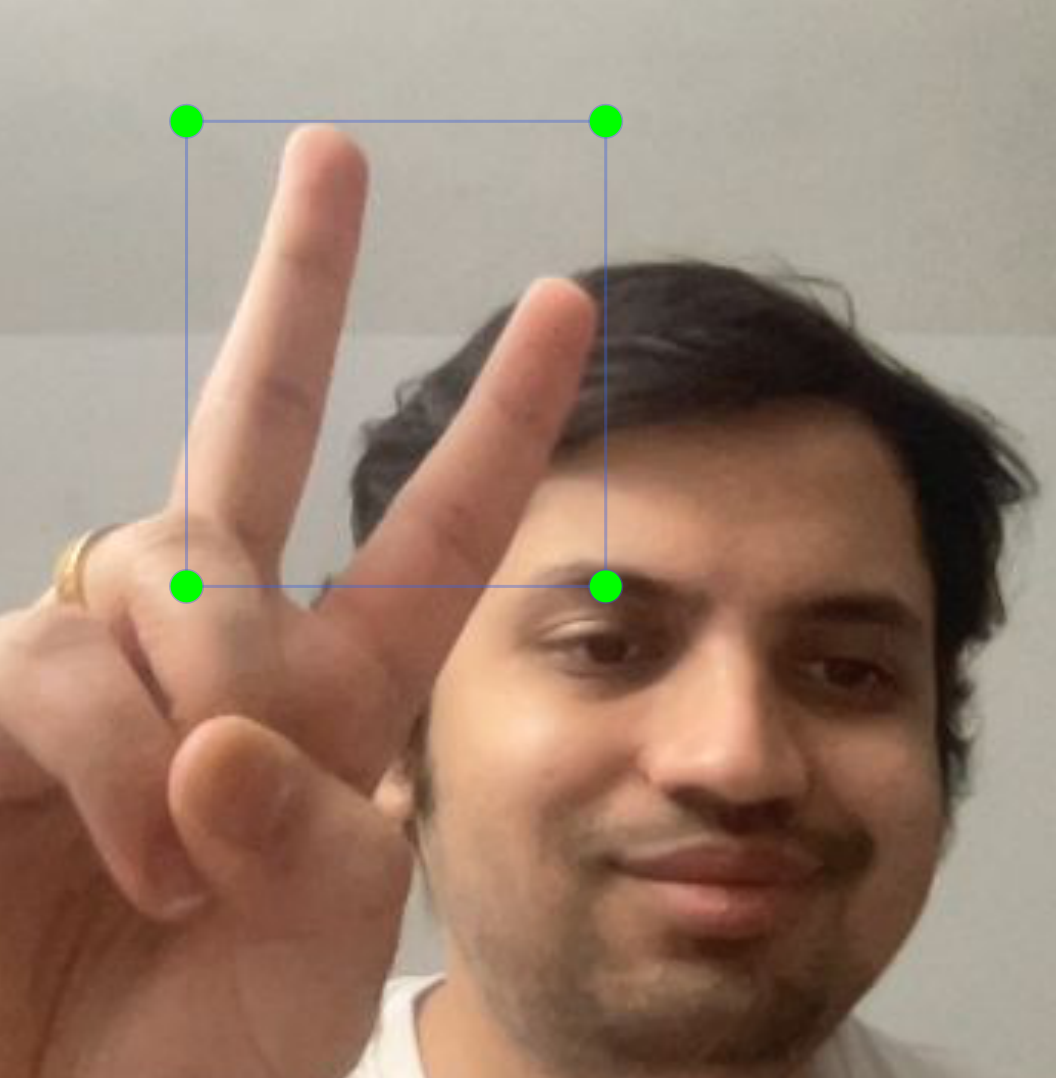